In [413]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight

In [414]:
df = pd.read_csv("datasets/train.csv")
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [415]:
df.shape

(381109, 12)

In [416]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [417]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [418]:
X = df.drop(["id","Response"],axis =1)
y = df["Response"]
X.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39


In [419]:
print(X['Gender'].unique())
print(X['Vehicle_Age'].unique())
print(X['Vehicle_Damage'].unique())

['Male' 'Female']
['> 2 Years' '1-2 Year' '< 1 Year']
['Yes' 'No']


In [420]:
X = pd.get_dummies(X)
X

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
0,44,1,28.0,0,40454.0,26.0,217,False,True,False,False,True,False,True
1,76,1,3.0,0,33536.0,26.0,183,False,True,True,False,False,True,False
2,47,1,28.0,0,38294.0,26.0,27,False,True,False,False,True,False,True
3,21,1,11.0,1,28619.0,152.0,203,False,True,False,True,False,True,False
4,29,1,41.0,1,27496.0,152.0,39,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,74,1,26.0,1,30170.0,26.0,88,False,True,True,False,False,True,False
381105,30,1,37.0,1,40016.0,152.0,131,False,True,False,True,False,True,False
381106,21,1,30.0,1,35118.0,160.0,161,False,True,False,True,False,True,False
381107,68,1,14.0,0,44617.0,124.0,74,True,False,False,False,True,False,True


In [421]:
X = X.astype("float")
y = y.astype("int")

In [422]:
scaler = StandardScaler()
scaler.fit_transform(X)
X

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
0,44.0,1.0,28.0,0.0,40454.0,26.0,217.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,76.0,1.0,3.0,0.0,33536.0,26.0,183.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,47.0,1.0,28.0,0.0,38294.0,26.0,27.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,21.0,1.0,11.0,1.0,28619.0,152.0,203.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,29.0,1.0,41.0,1.0,27496.0,152.0,39.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,74.0,1.0,26.0,1.0,30170.0,26.0,88.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
381105,30.0,1.0,37.0,1.0,40016.0,152.0,131.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
381106,21.0,1.0,30.0,1.0,35118.0,160.0,161.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
381107,68.0,1.0,14.0,0.0,44617.0,124.0,74.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [423]:
X.shape,y.shape

((381109, 14), (381109,))

In [424]:
y.value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

In [425]:
X = X.values
y = y.values

In [426]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=.05,random_state=42)

In [427]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X_train, y_train = adasyn.fit_resample(X_train, y_train)

In [428]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])


model.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics = ['accuracy'])

In [429]:
print(np.unique(y_train))

[0 1]


In [430]:
history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val,y_val))

Epoch 1/10
20194/20194 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.5053 - loss: 11.6870 - val_accuracy: 0.1272 - val_loss: 0.7029
Epoch 2/10
20194/20194 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.5068 - loss: 0.6963 - val_accuracy: 0.1272 - val_loss: 0.7060
Epoch 3/10
20194/20194 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.5081 - loss: 0.6965 - val_accuracy: 0.1272 - val_loss: 0.7088
Epoch 4/10
20194/20194 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.5076 - loss: 0.6943 - val_accuracy: 0.1272 - val_loss: 0.7118
Epoch 5/10
20194/20194 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.5081 - loss: 0.6934 - val_accuracy: 0.1272 - val_loss: 0.7094
Epoch 6/10
20194/20194 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.5074 - loss: 0.6932 - val_accuracy: 0.1272 - val_loss: 0.7118
Epoch 7/10
20194/20194 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.5073 - loss: 0.6935 - val_accuracy: 0.1272 - val_loss: 0.7031
Epoch 8/10
20194/20194 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - accuracy:

In [431]:
y_pred = model.predict(X_val)

596/596 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [432]:
y_pred = (y_pred > 0.5).astype(int)
print(classification_report(y_pred,y_val))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.13      0.23     19056

    accuracy                           0.13     19056
   macro avg       0.50      0.06      0.11     19056
weighted avg       1.00      0.13      0.23     19056



c:\Users\Sanju\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sanju\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sanju\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<function matplotlib.pyplot.show(close=None, block=None)>

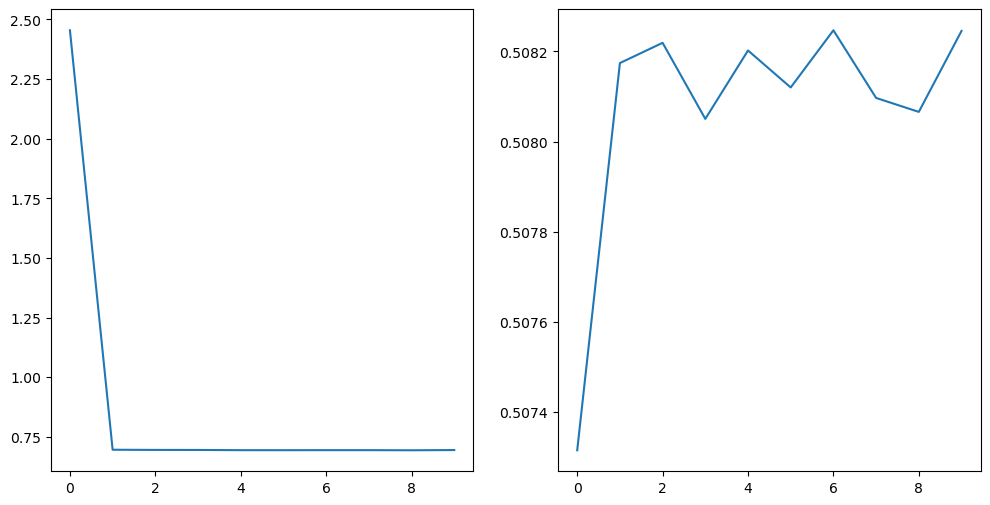

In [433]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'])

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.show